# Exponential smoothing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Preload some of the data in the notebook for expedience.

In [2]:
data = [2354.34, 2379.71, 2318.52, 2468.99, 2386.09, 2569.47, 2575.72, 2762.72, 2844.5, 3000.7, 3108.1, 3357.5, 3075.7, 3180.6, 3221.6, 3176.2, 3430.6, 3527.48, 3637.89, 3655.0]
index= pd.date_range(start='1989', end='2009', freq='A')
elecSales = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966, 44.66, 46.95, 48.73, 51.49, 50.03, 60.64, 63.36, 66.36, 68.20, 68.12, 69.78, 72.60]
index= pd.date_range(start='1990', end='2017', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock_train = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock_test = pd.Series(data, index)

data = [7204.0, 7335.0, 7812.0, 7413.0, 9136.0, 8725.0, 8751.0, 9609.0, 8601.0, 8930.0, 8835.0, 11688.0, 8078.0, 7892.0, 8151.0, 8738.0, 9416.0, 9533.0, 9943.0, 10859.0, 8789.0, 9960.0, 9619.0, 12900.0, 8620.0, 8401.0, 8546.0, 10004.0, 10675.0, 10115.0, 11206.0, 11555.0, 10453.0, 10421.0, 9950.0, 13975.0, 9315.0, 9366.0, 9910.0, 10302.0, 11371.0, 11857.0, 12387.0, 12421.0, 12073.0, 11963.0, 10666.0, 15613.0, 10586.0, 10558.0, 12064.0, 11899.0, 12077.0, 13918.0, 13611.0, 14132.0, 13509.0, 13152.0, 13993.0, 18203.0, 14262.0, 13024.0, 14062.0, 14718.0, 16544.0, 16732.0, 16230.0, 18126.0, 16016.0, 15601.0, 15394.0, 20439.0, 14991.0, 14908.0, 17459.0, 14501.0, 18271.0, 17963.0, 17026.0, 18111.0, 15989.0, 16735.0, 15949.0, 20216.0, 16198.0, 15060.0, 16168.0, 16376.0, 18403.0, 19113.0, 19303.0, 20560.0, 16621.0, 18788.0, 17970.0, 22464.0, 16658.0, 16214.0, 16043.0, 16418.0, 17644.0, 17705.0, 18107.0, 17975.0, 17598.0, 17658.0, 15750.0, 22414.0, 16065.0, 15467.0, 16297.0, 16530.0, 18410.0, 20274.0, 21311.0, 20991.0, 18305.0, 17832.0, 18223.0, 23987.0, 15964.0, 16606.0, 19216.0, 16419.0, 19638.0, 19773.0, 21052.0, 22011.0, 19039.0, 17893.0, 19276.0, 25167.0, 16699.0, 16619.0, 17851.0, 18160.0, 22032.0, 21395.0, 22217.0, 24565.0, 21095.0, 20114.0, 19931.0, 26120.0, 18580.0, 18492.0, 19724.0, 20123.0, 22582.0, 22595.0, 23379.0, 24920.0, 20325.0, 22038.0, 20988.0, 26675.0]
index= pd.date_range(start='2000', end='2013', freq='M')
debitcards = pd.Series(data, index)

Text(0.5, 1.0, 'Monthly retail debit card usage in Iceland (million ISK)')

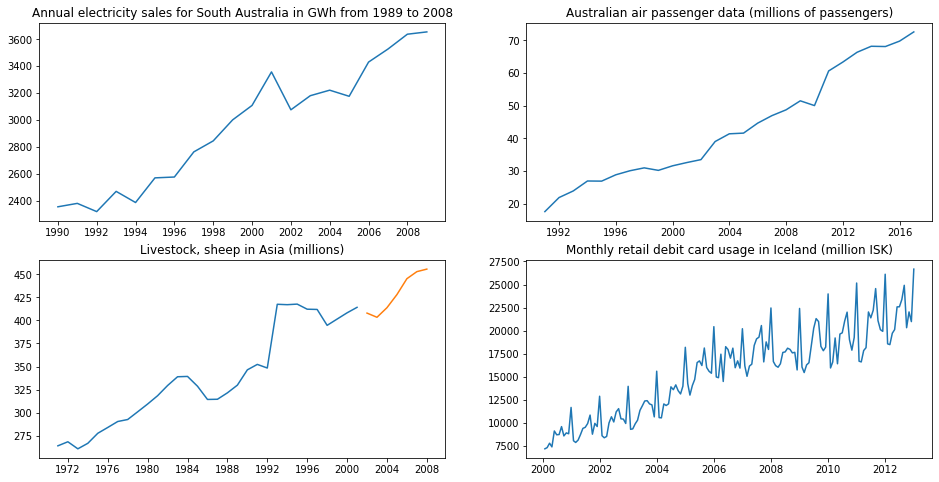

In [3]:
fig, axes = plt.subplots(2,2, figsize=(16, 8))

axes[0][0].plot(elecSales)
axes[0][0].set_title("Annual electricity sales for South Australia in GWh from 1989 to 2008")

axes[0][1].plot(air)
axes[0][1].set_title("Australian air passenger data (millions of passengers)")

axes[1][0].plot(livestock_train)
axes[1][0].plot(livestock_test)
axes[1][0].set_title("Livestock, sheep in Asia (millions)")

axes[1][1].plot(debitcards)
axes[1][1].set_title('Monthly retail debit card usage in Iceland (million ISK)')



## Simple Exponential Smoothing
Lets use Simple Exponential Smoothing to forecast the ```annual electricity sales```.

Here we run three variants of simple exponential smoothing:
1. In ```ses1``` we do not use the auto optimization but instead choose to explicitly provide the model with the $\alpha=0.2$ parameter
2. In ```ses2``` as above and we choose an $\alpha=0.6$
3. In ```ses3``` we allow statsmodels to automatically find an optimized $\alpha$ value for us. This is the recommended approach.

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
ses1 = SimpleExpSmoothing(elecSales).fit(smoothing_level=0.2,optimized=False)
ses1_forecast = ses1.forecast(3)

ses2 = SimpleExpSmoothing(elecSales).fit(smoothing_level=0.6,optimized=False)
ses2_forecast = ses2.forecast(3)

ses3 = SimpleExpSmoothing(elecSales).fit()
ses3_forecast = ses3.forecast(3)

In [6]:
def fittedvalues_and_forecast_plot(fittedvalues, forecast, ax, color):
    fittedvalues.plot(marker='o', ax=ax, color=color)
    forecast.plot(marker='o', ax=ax, color=color)

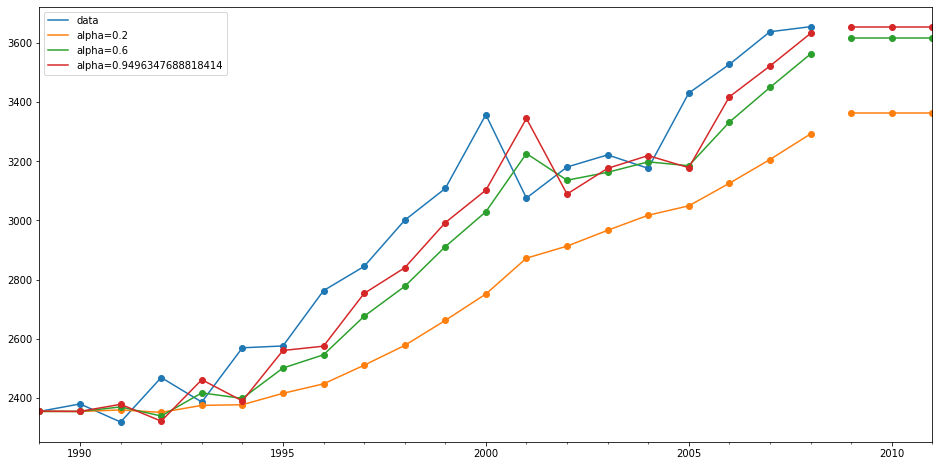

In [7]:
import matplotlib.lines as mlines
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax = elecSales.plot(marker='o', figsize=(16,8))

fittedvalues_and_forecast_plot(ses1.fittedvalues, ses1_forecast, ax, colors[1])
fittedvalues_and_forecast_plot(ses2.fittedvalues, ses2_forecast, ax, colors[2])
fittedvalues_and_forecast_plot(ses3.fittedvalues, ses3_forecast, ax, colors[3])

data_line = mlines.Line2D([], [], color=colors[0], label='data')
ses1_line = mlines.Line2D([], [], color=colors[1], label='alpha=0.2')
ses2_line = mlines.Line2D([], [], color=colors[2], label='alpha=0.6')
ses3_line = mlines.Line2D([], [], color=colors[3], label='alpha=%s'%ses3.model.params['smoothing_level'])
plt.legend(handles=[data_line, ses1_line, ses2_line, ses3_line])

plt.show()

## Holt's Method

Lets take a look at another example.
This time we use air pollution data and the Holt's Method.
We will fit three examples again.
1. In ```holt1``` we again choose not to use the optimizer and provide explicit values for $\alpha=0.8$ and $\beta=0.2$
2. In ```holt2``` we do the same as in ```fit1``` but choose to use an exponential model rather than a Holt's additive model.
3. In ```holt3``` we used a damped versions of the Holt's additive model but allow the dampening parameter $\phi$ to be optimized while fixing the values for $\alpha=0.8$ and $\beta=0.2$

In [8]:
holt1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
holt1_forecast = holt1.forecast(5)

holt2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
holt2_forecast = holt2.forecast(5)

holt3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
holt3_forecast = holt3.forecast(5)

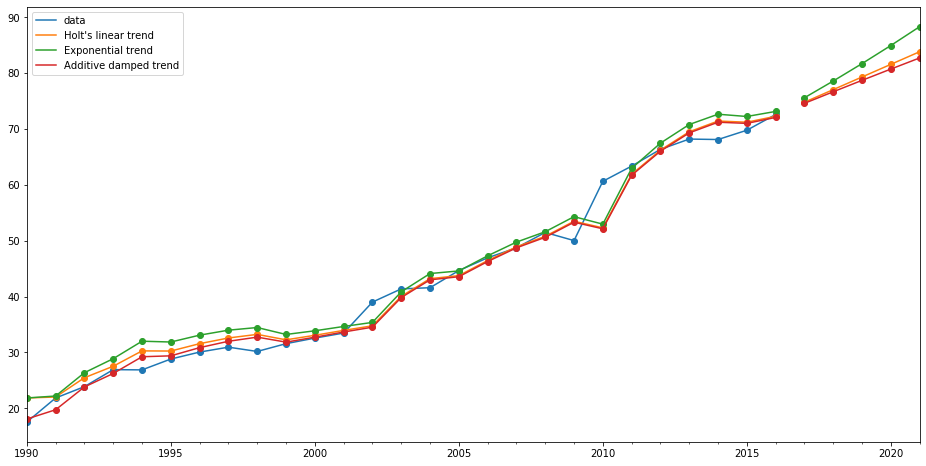

In [9]:
ax = air.plot(marker="o", figsize=(16,8))

fittedvalues_and_forecast_plot(holt1.fittedvalues, holt1_forecast, ax, colors[1])
fittedvalues_and_forecast_plot(holt2.fittedvalues, holt2_forecast, ax, colors[2])
fittedvalues_and_forecast_plot(holt3.fittedvalues, holt3_forecast, ax, colors[3])

data_line = mlines.Line2D([], [], color=colors[0], label='data')
holt1_line = mlines.Line2D([], [], color=colors[1], label="Holt's linear trend")
holt2_line = mlines.Line2D([], [], color=colors[2], label='Exponential trend')
holt3_line = mlines.Line2D([], [], color=colors[3], label='Additive damped trend')
plt.legend(handles=[data_line, holt1_line, holt2_line, holt3_line])

plt.show()

### Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt's models.
The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.
 
Note: ```fit4``` does not allow the parameter $\phi$ to be optimized by providing a fixed value of $\phi=0.98$

In [10]:
fit1 = SimpleExpSmoothing(livestock_train).fit()
fit2 = Holt(livestock_train).fit()
fit3 = Holt(livestock_train,exponential=True).fit()
fit4 = Holt(livestock_train,damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock_train,exponential=True,damped=True).fit()

In [11]:
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']

results=pd.DataFrame(index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
                     columns=['SES', "Holt's", "Exponential", "Additive", "Multiplicative"])

results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]

results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977634,0.978826,0.974909
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981647
$l_0$,263.918414,258.882623,260.341629,257.355026,258.951972
$b_0$,NaN,5.010769,1.013780,6.644317,1.038144
SSE,6761.350218,6004.138200,6104.194747,6036.555016,6081.995045


### Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table's fits.

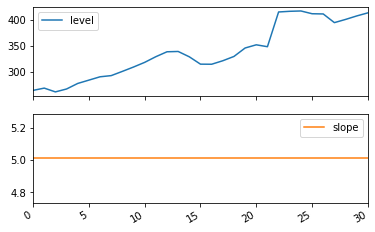

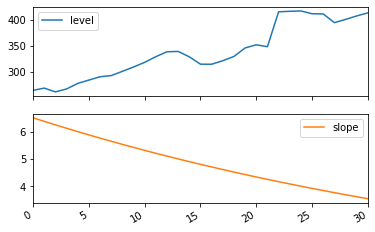

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [12]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

### Forecast Comparison
Here we plot a comparison Simple Exponential Smoothing and Holt's Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

In [13]:
fit1_forecast = fit1.forecast(9).rename("SES")
fit2_forecast = fit2.forecast(9).rename("Holt's")
fit3_forecast = fit3.forecast(9).rename("Exponential")
fit4_forecast = fit4.forecast(9).rename("Additive Damped")
fit5_forecast = fit5.forecast(9).rename("Multiplicative Damped")

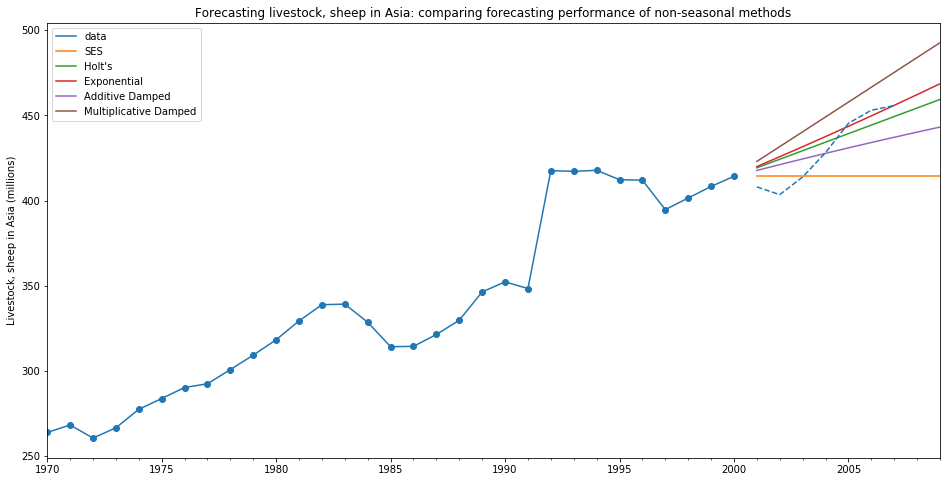

In [14]:
ax = livestock_train.plot(marker="o", color=colors[0], figsize=(16,8), label='data', legend=True)

fit1_forecast.plot(ax=ax, color=colors[1], legend=True)
fit2_forecast.plot(ax=ax, color=colors[2], legend=True)
fit3_forecast.plot(ax=ax, color=colors[3], legend=True)
fit4_forecast.plot(ax=ax, color=colors[4], legend=True)
fit5_forecast.plot(ax=ax, color=colors[5], legend=True)

livestock_test.plot(style='--', ax=ax, color=colors[0], legend=False)

ax.set_ylabel('Livestock, sheep in Asia (millions)')
ax.set_title('Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods')
plt.show()

## Holt's Winters Seasonal
Finally we are able to run full Holt's Winters Seasonal Exponential Smoothing  including a trend component and a seasonal component.
statsmodels allows for all the combinations including as shown in the examples below:
1. ```hw1``` additive trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```hw2``` additive trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation..
1. ```hw3``` additive damped trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```hw4``` additive damped trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.



In [15]:
hw1 = ExponentialSmoothing(debitcards, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
hw2 = ExponentialSmoothing(debitcards, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
hw3 = ExponentialSmoothing(debitcards, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
hw4 = ExponentialSmoothing(debitcards, seasonal_periods=12, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

The table allows us to compare the results and parameterizations.

In [16]:
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [hw1.params[p] for p in params] + [hw1.sse]
results["Multiplicative"] = [hw2.params[p] for p in params] + [hw2.sse]
results["Additive Dam"]   = [hw3.params[p] for p in params] + [hw3.sse]
results["Multiplica Dam"] = [hw4.params[p] for p in params] + [hw4.sse]

results

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,2.802886e-01,3.403004e-01,2.749838e-01,3.350562e-01
$\beta$,1.518491e-19,3.792651e-09,1.238931e-14,1.409058e-31
$\phi$,NaN,NaN,9.972549e-01,9.962205e-01
$\gamma$,2.792487e-01,0.000000e+00,2.962889e-01,0.000000e+00
$l_0$,1.691669e+03,1.727029e+03,1.673476e+03,1.727010e+03
$b_0$,8.625127e+00,1.250175e+01,1.071594e+01,1.677970e+01
SSE,9.682614e+07,7.372353e+07,9.680164e+07,7.338101e+07


The plot shows the results and forecast for ```hw1``` and ```hw2```.


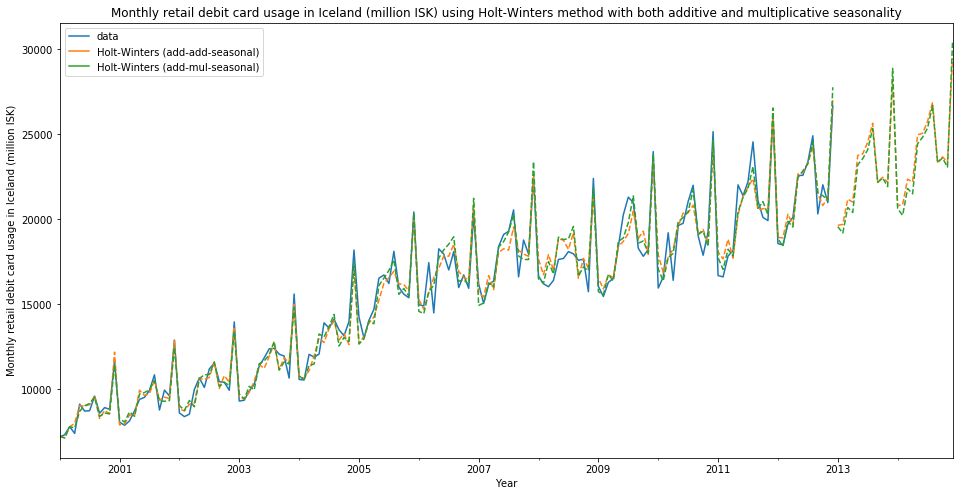

In [17]:
ax = debitcards.plot(figsize=(16,8), color=colors[0])
ax.set_title('Monthly retail debit card usage in Iceland (million ISK) using Holt-Winters method with both additive and multiplicative seasonality')
ax.set_ylabel("Monthly retail debit card usage in Iceland (million ISK)")
ax.set_xlabel("Year")

hw1.fittedvalues.plot(ax=ax, style='--', color=colors[1])
hw1.forecast(24).plot(ax=ax, style='--', color=colors[1], label='Holt-Winters (add-add-seasonal)')

hw2.fittedvalues.plot(ax=ax, style='--', color=colors[2])
hw2.forecast(24).plot(ax=ax, style='--', color=colors[2], label='Holt-Winters (add-mul-seasonal)')

data_line = mlines.Line2D([], [], color=colors[0], label='data')
hw1_line = mlines.Line2D([], [], color=colors[1], label="Holt-Winters (add-add-seasonal)")
hw2_line = mlines.Line2D([], [], color=colors[2], label='Holt-Winters (add-mul-seasonal)')
plt.legend(handles=[data_line, hw1_line, hw2_line])

plt.show()

### The Internals
It is possible to get at the internals of the Exponential Smoothing models. 

Here we show some tables that allow you to view side by side the original values $y_t$, the level $l_t$, the trend $b_t$, the season $s_t$ and the fitted values $\hat{y}_t$.

In [18]:
df = pd.DataFrame(np.c_[debitcards, hw1.level, hw1.slope, hw1.season, hw1.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=debitcards.index)
df.append(hw1.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2000-01-31,7195.906149,-11215.698624,12915.992560,-5717.470797,7204.0
2000-02-29,7166.222195,-11347.989501,13057.169262,-5836.379529,7335.0
2000-03-31,7796.387672,-11425.744299,13148.976204,-5347.619832,7812.0
2000-04-30,8015.490665,-11311.333956,13043.684078,-5220.471747,7413.0
2000-05-31,9046.519915,-11436.046125,13157.937375,-4083.980604,9136.0
2000-06-30,9017.730695,-11421.309246,13154.548555,-4227.207290,8725.0
2000-07-31,9107.839309,-11398.656806,13131.559871,-4133.704410,8751.0
2000-08-31,9617.241318,-11485.400297,13216.021833,-3601.276752,9609.0
2000-09-30,8292.305641,-11660.850217,13399.849479,-5010.809967,8601.0
2000-10-31,8760.073893,-11782.856813,13540.044906,-4727.162191,8930.0


In [19]:
df = pd.DataFrame(np.c_[debitcards, hw2.level, hw2.slope, hw2.season, hw2.fittedvalues], 
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=debitcards.index)
df.append(hw2.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2000-01-31,7265.498027,-11530.576422,13270.106902,0.545930,7204.0
2000-02-29,7141.407635,-11771.656571,13519.890264,0.533079,7335.0
2000-03-31,7809.227448,-11875.613045,13648.522381,0.572236,7812.0
2000-04-30,7736.867238,-11793.233893,13578.807177,0.561628,7413.0
2000-05-31,8715.052517,-12151.707103,13930.420489,0.635860,9136.0
2000-06-30,9039.678411,-12078.044684,13891.270000,0.643012,8725.0
2000-07-31,9173.394479,-11989.136028,13798.529192,0.654350,8751.0
2000-08-31,9543.998370,-12158.104131,13958.409064,0.685330,9609.0
2000-09-30,8409.540067,-12379.392447,14195.355749,0.596998,8601.0
2000-10-31,8613.341587,-12663.502284,14502.591689,0.601329,8930.0


Finally lets look at the levels, slopes/trends and seasonal components of the models.

In [20]:
states1 = pd.DataFrame(np.c_[hw1.level, hw1.slope, hw1.season], columns=['level','slope','seasonal'], index=debitcards.index)
states2 = pd.DataFrame(np.c_[hw2.level, hw2.slope, hw2.season], columns=['level','slope','seasonal'], index=debitcards.index)


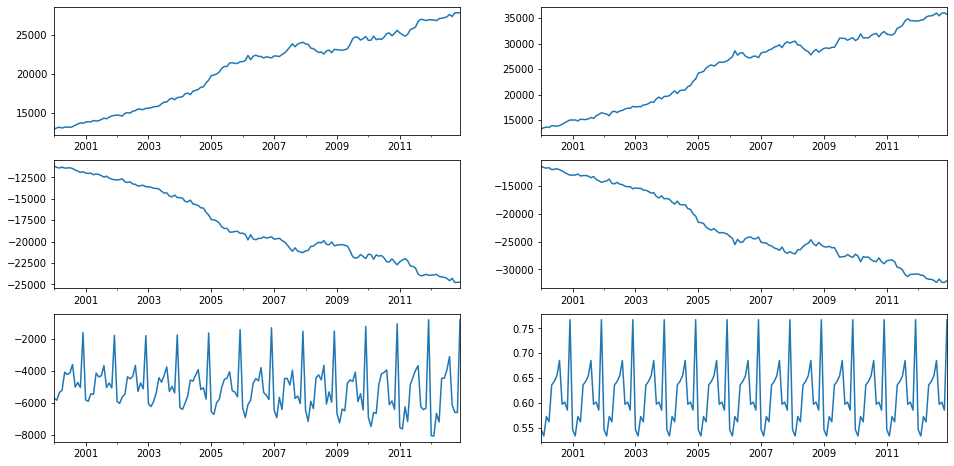

In [21]:
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(16,8))

states1['level'].plot(ax=ax1)
states1['slope'].plot(ax=ax2)
states1['seasonal'].plot(ax=ax3)

states2['level'].plot(ax=ax4)
states2['slope'].plot(ax=ax5)
states2['seasonal'].plot(ax=ax6)

plt.show()

## Exercises
- "ukcars" Quarterly UK passenger car production (thousands of cars). 1977:1-2005:1

In [22]:
data = [330.371, 371.051, 270.67, 343.88, 358.491, 362.822, 261.281, 240.355, 325.382, 316.7, 171.153, 257.217, 298.127, 251.464, 181.555, 192.598, 245.652, 245.526, 225.261, 238.211, 257.385, 228.461, 175.371, 226.462, 266.15, 287.251, 225.883, 265.313, 272.759, 234.134, 196.462, 205.551, 291.283, 284.422, 221.571, 250.697, 253.757, 267.016, 220.388, 277.801, 283.233, 302.072, 259.72, 297.658, 306.129, 322.106, 256.723, 341.877, 356.004, 361.54, 270.433, 311.105, 326.688, 327.059, 274.257, 367.606, 346.163, 348.211, 250.008, 292.518, 343.318, 343.429, 275.386, 329.747, 364.521, 378.448, 300.798, 331.757, 362.536, 389.133, 323.322, 391.832, 421.646, 416.823, 311.713, 381.902, 422.982, 427.722, 376.85, 458.58, 436.225, 441.487, 369.566, 450.723, 462.442, 468.232, 403.636, 413.948, 460.496, 448.932, 407.787, 469.408, 494.311, 433.24, 335.106, 378.795, 387.1, 372.395, 335.79, 397.08, 449.755, 402.252, 391.847, 385.89, 424.325, 433.28, 391.213, 408.74, 445.458, 428.202, 379.048, 394.042, 432.796]
index= pd.date_range(start='1977', end='2005-Q2', freq='Q')
ukcars = pd.Series(data, index)


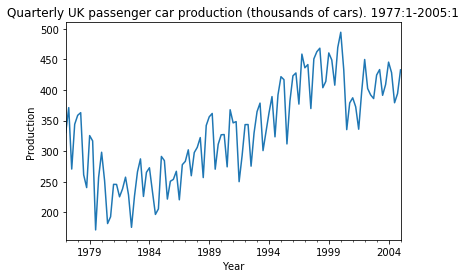

In [23]:
ax = ukcars.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Production")
ax.set_title("Quarterly UK passenger car production (thousands of cars). 1977:1-2005:1")

plt.show()